# Explination of the data
## Squirrel Census 2018

The following charts depict data from the 2018 Squirrel Census conducted in NYC Central Park. The census was collected over the span of 15 days and includes 3,023 squirrel sightings. The data set captured squirrel location, fur color, and a series of activities that the squirrels were engaged with at the time of sighting (including foraging, eating, chasing, and running).

The first chart depicts the latitude and longitude of locations where the squirrels were observed. An ariel image of NYC Central Park is include as a visual reference point. The second chart was motivated by the question: What color squirrels were chasing each other at the time of the sightings? The bar chart shows a breakdown of squirrel chasing activity by color of squirrel fur. The third chart captures a count of squirrel activity over the census period.

https://www.thesquirrelcensus.com/

<img src="detective.png" alt="Detective" width="350"/> <img src="seenmesquirrel.jpg" alt="Seen Me Squirrel" width="410"/>

In [1]:
library('tidyverse')
library('lubridate')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
squirrel_data = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-05-23/squirrel_data.csv')

squirrel_data |> variable.names()

Rows: 3023 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): Unique Squirrel ID, Hectare, Shift, Age, Primary Fur Color, Highli...
dbl  (4): X, Y, Date, Hectare Squirrel Number
lgl (13): Running, Chasing, Climbing, Eating, Foraging, Kuks, Quaas, Moans, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "X"                                         
 [2] "Y"                                         
 [3] "Unique Squirrel ID"                        
 [4] "Hectare"                                   
 [5] "Shift"                                     
 [6] "Date"                                      
 [7] "Hectare Squirrel Number"                   
 [8] "Age"                                       
 [9] "Primary Fur Color"                         
[10] "Highlight Fur Color"                       
[11] "Combination of Primary and Highlight Color"
[12] "Color notes"                               
[13] "Location"                                  
[14] "Above Ground Sighter Measurement"          
[15] "Specific Location"                         
[16] "Running"                                   
[17] "Chasing"                                   
[18] "Climbing"                                  
[19] "Eating"                                    
[20] "Foraging"                                  
[21] "Other Activities"                          
[22] "Kuks"                                      
[23] "Quaas"                                     
[24] "Moans"                                     
[25] "Tail flags"                                
[26] "Tail twitches"                             
[27] "Approaches"                                
[28] "Indifferent"                               
[29] "Runs from"                                 
[30] "Other Interactions"                        
[31] "Lat/Long"

In [3]:
squirrel_data_color = squirrel_data |>
# filter(Age %in% c('Juvenile', 'Adult')) |>
filter(`Primary Fur Color` %in% c('Gray', 'Cinnamon', 'Black')) |>
select(`X`, `Y`, `Primary Fur Color`, `Chasing`)

squirrel_data_color |> head()

X,Y,Primary Fur Color,Chasing
<dbl>,<dbl>,<chr>,<lgl>
-73.97428,40.77553,Gray,TRUE
-73.95964,40.79031,Gray,FALSE
-73.97027,40.77621,Gray,FALSE
-73.96836,40.77259,Cinnamon,FALSE
-73.95412,40.79318,Gray,FALSE
-73.95827,40.79174,Gray,FALSE


## Image of NYC Manhattan Central Park as a reference for the latitude and longitude
![image.png](Central-Park-Manhattan-aerial-photo-map.jpg)

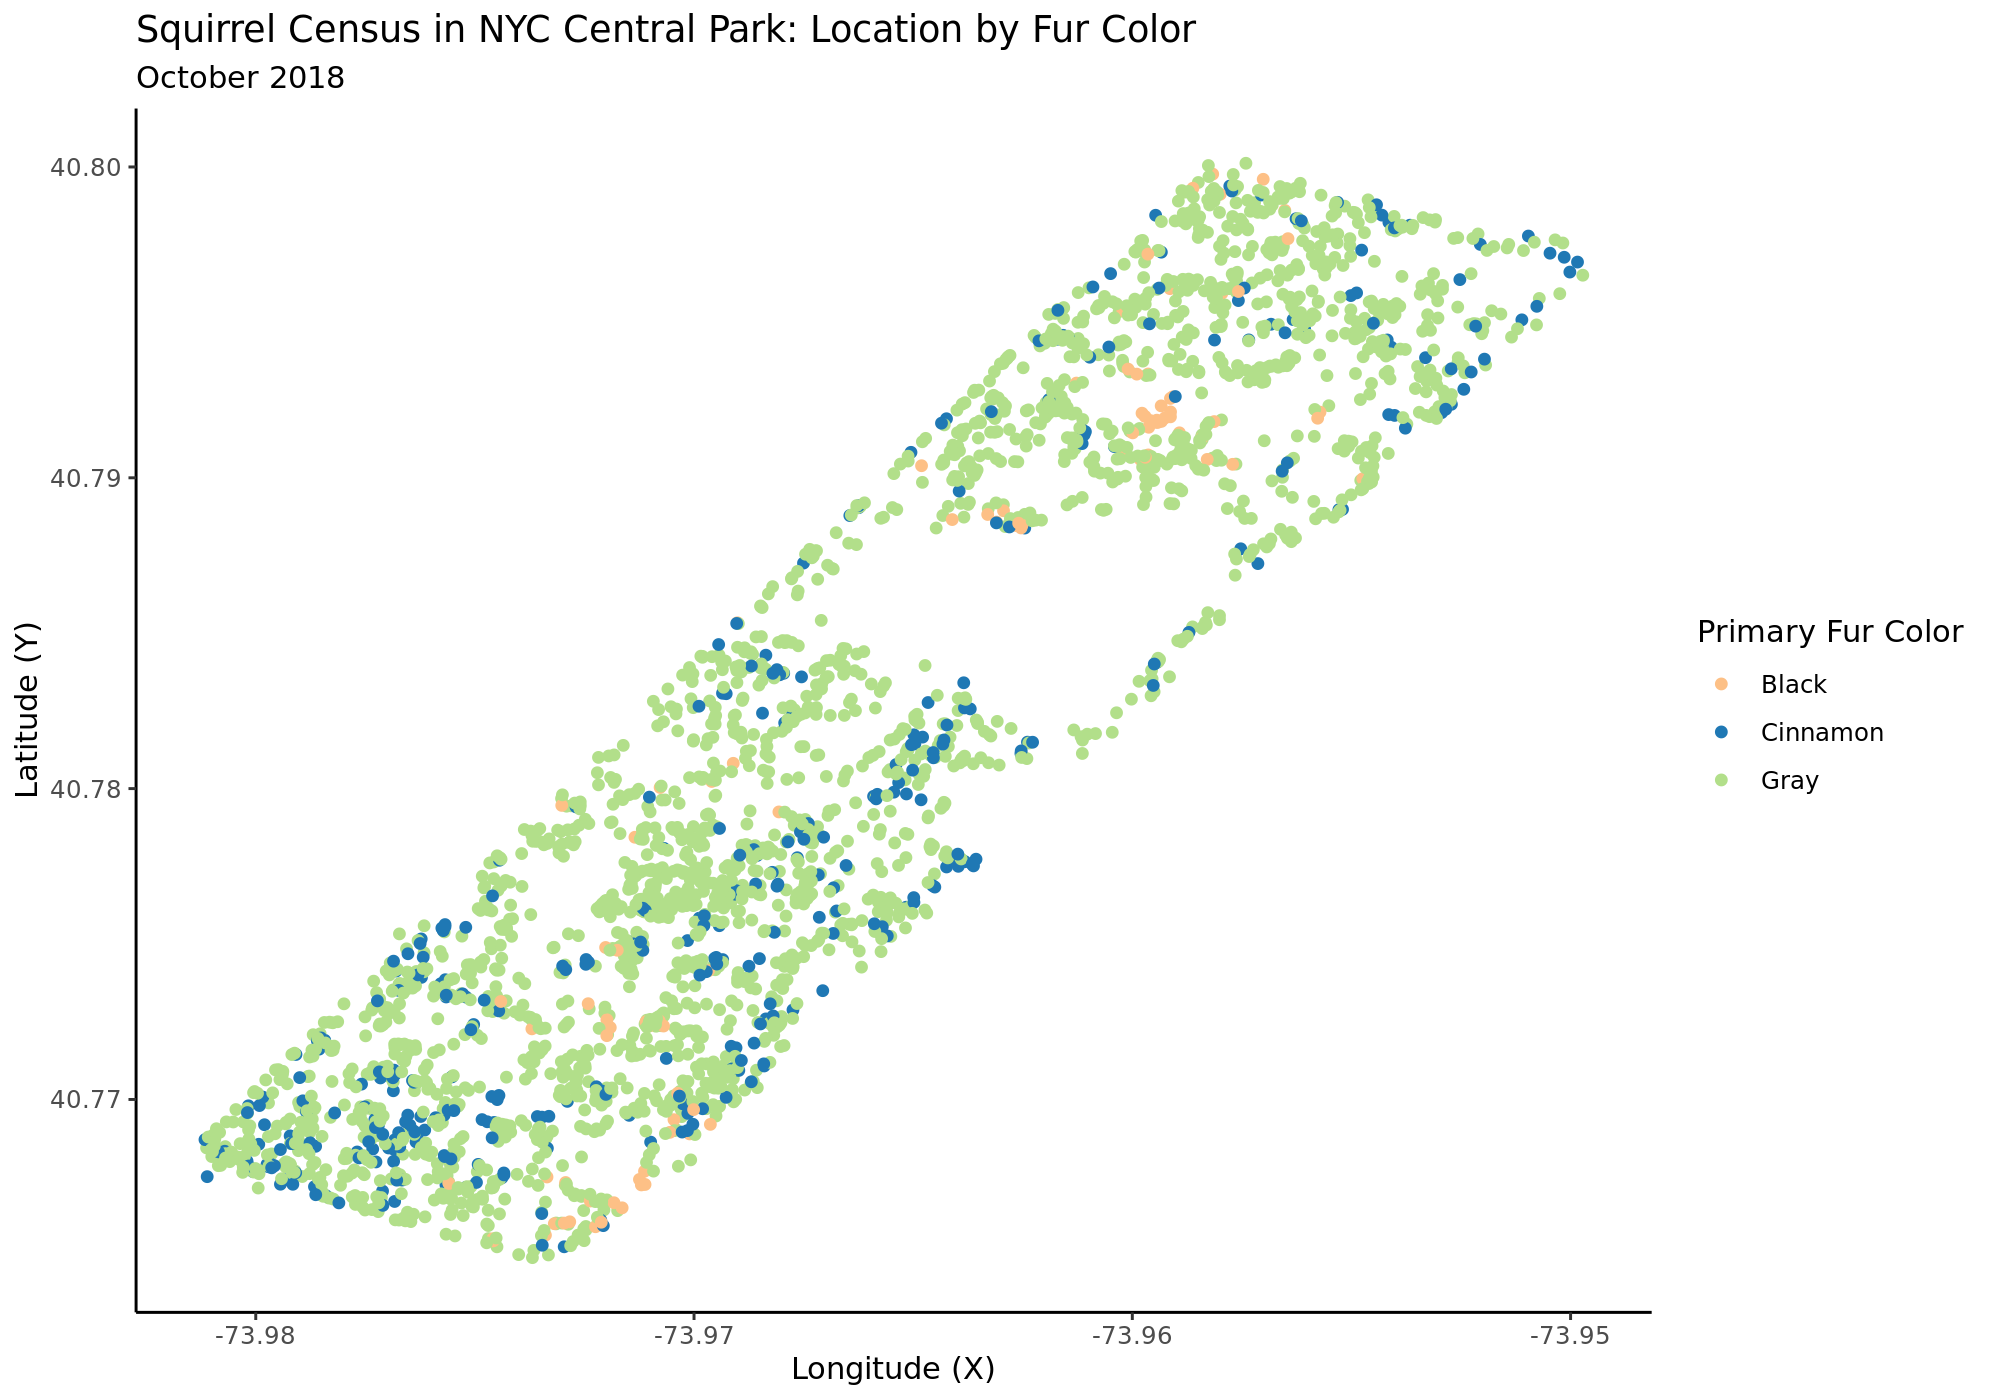

In [4]:
options(repr.plot.res = 200, repr.plot.width = 10)

colors = c('#fdc086','#1f78b4','#b2df8a')

p = ggplot(squirrel_data_color, aes(x = X, y = Y, color = `Primary Fur Color`)) + 
    geom_point() + 
    labs(x = 'Longitude (X)', y = 'Latitude (Y)', title = "Squirrel Census in NYC Central Park: Location by Fur Color", 
        subtitle = "October 2018") +
    theme_classic() + 
    scale_color_manual(values = colors)
p

In [5]:
df.furcount = squirrel_data$`Primary Fur Color` |> table()

df.furcount


   Black Cinnamon     Gray 
     103      392     2473 

In [6]:
df.fur = squirrel_data |> 
    # group_by(`Primary Fur Color`) |>
     filter(!is.na(`Primary Fur Color`)) |> 
    pull(`Primary Fur Color`) |>
    factor() |> 
    levels()

df.fur

[1] "Black"    "Cinnamon" "Gray"

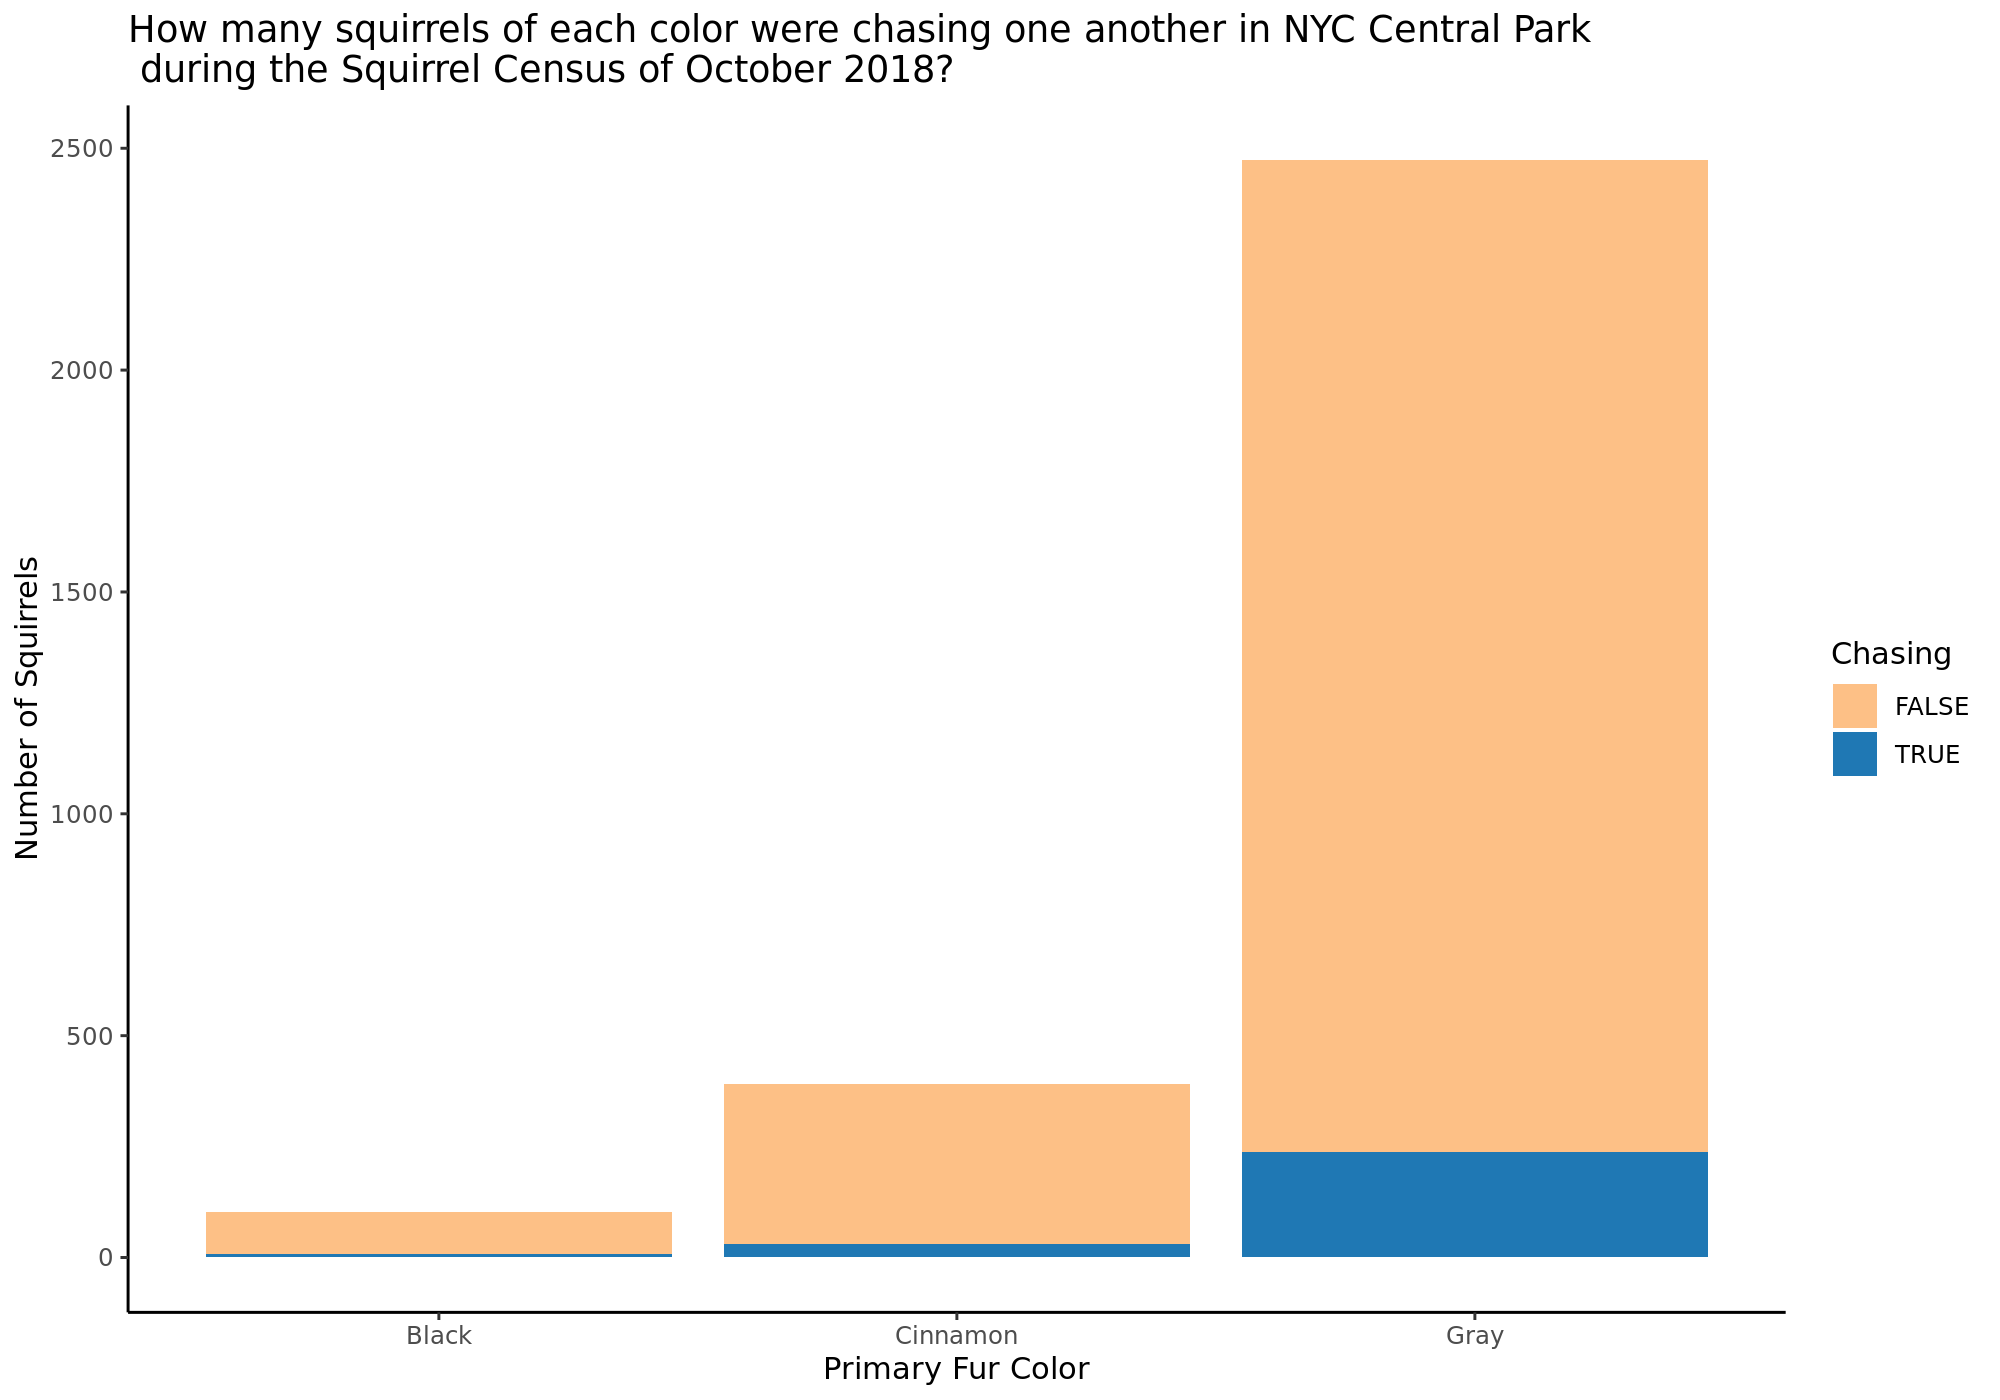

In [10]:
options(repr.plot.res = 200)
colors = c('#fdc086','#1f78b4')
title = "How many squirrels of each color were chasing one another in NYC Central Park \n during the Squirrel Census of October 2018?"
title_wrap = strwrap(title, width = 60)

p.squirrel = ggplot(squirrel_data_color, aes(x = `Primary Fur Color`, fill = `Chasing`)) + 
    geom_bar() + 
    theme_classic() + 
    scale_fill_manual(values = colors) +
    labs(y = 'Number of Squirrels', title = title)

p.squirrel

In [8]:
df.activities = squirrel_data |>
    group_by(`Date`) |>
    summarize(`Eating` = sum(`Eating` == TRUE), 
              `Foraging` = sum(`Foraging` == TRUE), 
              `Chasing` = sum(`Chasing` == TRUE), 
             `Climbing` = sum(`Climbing` == TRUE)) 

df.activities

Date,Eating,Foraging,Chasing,Climbing
<dbl>,<int>,<int>,<int>,<int>
10062018,85,141,29,84
10072018,95,169,31,122
10082018,77,136,30,65
10102018,94,173,22,67
10122018,67,131,28,48
10132018,108,224,31,74
10142018,80,171,42,79
10172018,64,118,27,35
10182018,39,81,18,40


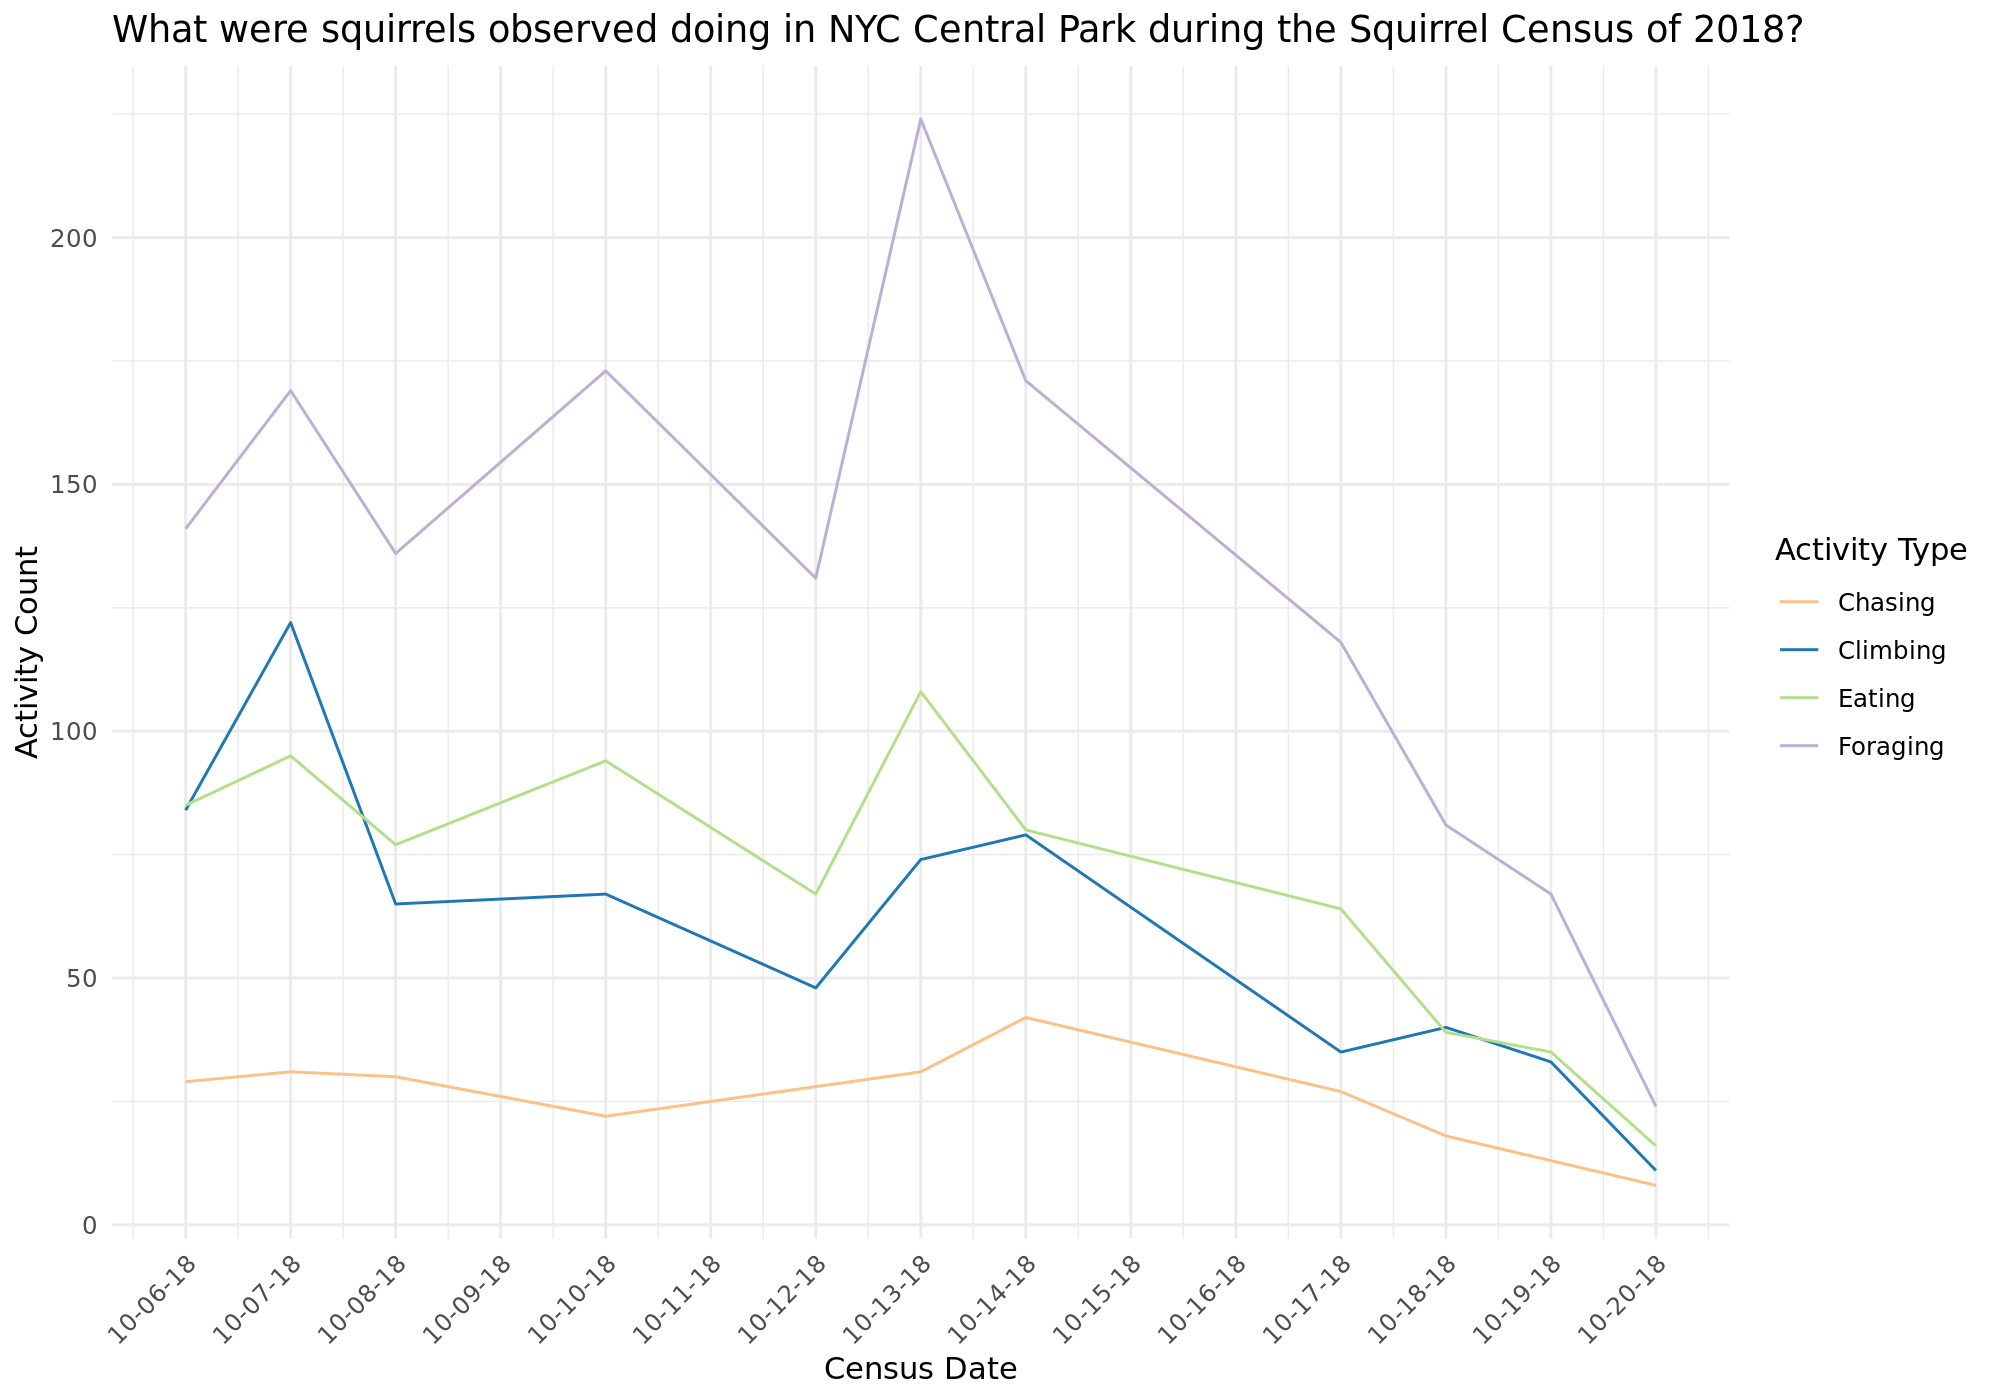

In [9]:
df.activities_long = df.activities |>
  gather(key = "Activity_Type", value = "Number_of_Activities", -Date)

df.activities_long$Date = mdy(df.activities_long$Date)

colors = c('#fdc086','#1f78b4','#b2df8a', '#beaed4')

p_activities = ggplot(data = df.activities_long, aes(x = Date, y = Number_of_Activities, color = Activity_Type)) +
    geom_line() +
    labs(title = "What were squirrels observed doing in NYC Central Park during the Squirrel Census of 2018?",
       x = "Census Date",
       y = "Activity Count",
       color = "Activity Type") +
    theme_minimal() +
    scale_color_manual(values = colors) +
      theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    scale_x_date(labels = scales::date_format("%m-%d-%y"), date_breaks = "1 day")

p_activities